# Pop dyn tests

In [6]:
import numpy as np
import pandas as pd
from typing import List, Text, Optional

from rl4fisheries import Msy, ConstEsc, CautionaryRule, AsmEnv
from rl4fisheries.envs.asm_fns import get_r_devs

In [135]:
r_devs = get_r_devs(n_year=1000)
config = {"s":  0.90, "r_devs": r_devs}
env = AsmEnv(config = config)

In [136]:
def simulate_ep(env, agent, other_vars: Optional[List[Text]] = []):   
    simulation = {
        't': [],
        'surv_b_obs': [],
        'bare_surv_b_obs': [],
        'mean_wt_obs': [],
        'act': [],
        'rew': [],
        'total_pop': [],
        'newborns': [],
        'non_random_newb': [],
        **{var_name: [] for var_name in other_vars}
    }
    obs, _ = env.reset()
    for t in range(env.Tmax):
        act, _ = agent.predict(obs)
        new_obs, rew, term, trunc, info = env.step(act)
        #
        simulation['t'].append(t)
        simulation['surv_b_obs'].append(
            env.bound * (obs[0]+1)/2
        )
        simulation['bare_surv_b_obs'].append(
            obs[0]
        )
        simulation['mean_wt_obs'].append(
            (
                env.parameters["min_wt"]
                + (env.parameters["max_wt"] - env.parameters["min_wt"])
                * (obs[1]+1)/2
            )
        )
        simulation['act'].append(act[0])
        simulation['rew'].append(rew)
        simulation['total_pop'].append(np.sum(env.state))
        simulation['newborns'].append(env.state[0])
        simulation['non_random_newb'].append(
            env.parameters["bha"] * env.ssb / (1 + env.parameters["bhb"] * env.ssb)
        )
        for var_name in other_vars:
            simulation[var_name].append(getattr(env, var_name))
        #
        obs = new_obs
    #
    return simulation

In [137]:
trivp = Msy(env = env, mortality=0)
trivial_ep = pd.DataFrame(simulate_ep(AsmEnv(config=config), trivp, other_vars=['ssb']))

<Axes: title={'center': 'Unfished ssb'}, xlabel='t'>

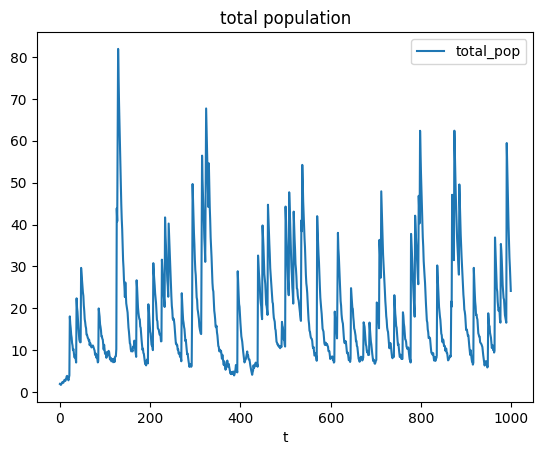

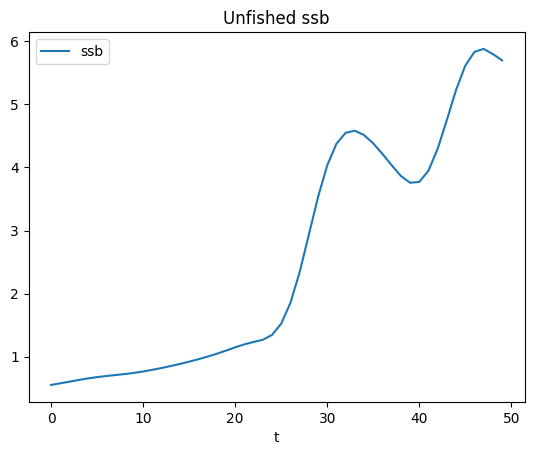

In [138]:
trivial_ep.plot(x='t', y = ['total_pop'], title='total population')
# trivial_ep.plot(x='t', y = ['non_random_newb'], title='Unfished non-random newborns')
trivial_ep[trivial_ep.t < 50].plot(x='t', y = ['ssb'], title='Unfished ssb')
# trivial_ep.plot(x='t', y = ['newborns'], title='newborns', logy=True)
# trivial_ep.plot(x='t', y = ['bare_surv_b_obs'], title='surv_b_obs')

## Escapement

In [118]:
escp = ConstEsc(env, escapement = 0.05)
esc_ep = pd.DataFrame(simulate_ep(AsmEnv(config=config), escp, other_vars=['ssb']))

<Axes: title={'center': 'surv_b_obs'}, xlabel='t'>

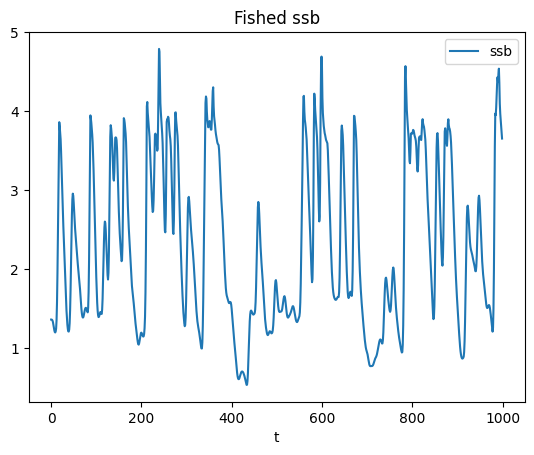

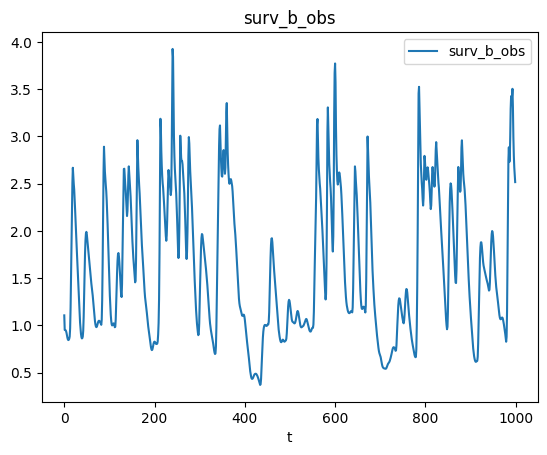

In [119]:
# esc_ep.plot(x='t', y = ['total_pop'], title='total population')
# esc_ep.plot(x='t', y = ['non_random_newb'], title='non-random newborns')
esc_ep.plot(x='t', y = ['ssb'], title='Fished ssb')
# esc_ep.plot(x='t', y = ['newborns'], title='newborns', logy=True)
# esc_ep.plot(x='t', y = ['act'], title='actions')
esc_ep.plot(x='t', y = ['surv_b_obs'], title='surv_b_obs')

In [28]:
esc_ep.head()

,t,surv_b_obs,mean_wt_obs,act,rew,total_pop,newborns,non_random_newb,ssb
0,0,1.225387,0.622407,-0.060890,0.926308,3.692093,0.000000,0.783215,0.834071
1,1,0.588220,0.556437,-1.000000,0.000000,4.095136,0.919936,0.791500,0.859990
2,2,0.609490,0.556648,-1.000000,0.000000,3.521817,0.000000,0.801552,0.892880
3,3,0.633958,0.565610,-1.000000,0.000000,3.028762,0.000000,0.812020,0.928948
4,4,0.657231,0.580948,-0.977997,0.014585,3.350002,0.765073,0.818408,0.951927


In [91]:
mid = Msy(env = env, mortality=0.05)
mid_ep = pd.DataFrame(simulate_ep(AsmEnv(config=config), mid, other_vars=['ssb']))

<Axes: title={'center': 'newborns'}, xlabel='t'>

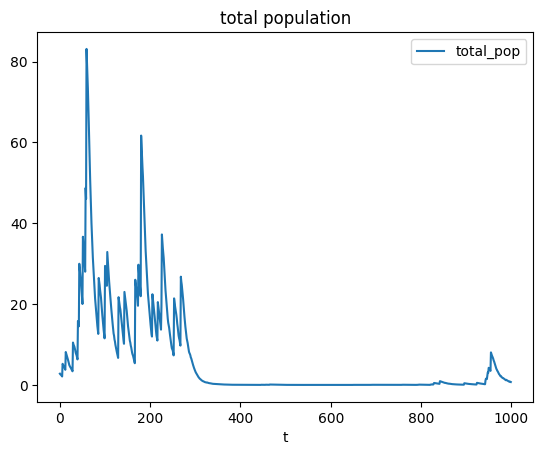

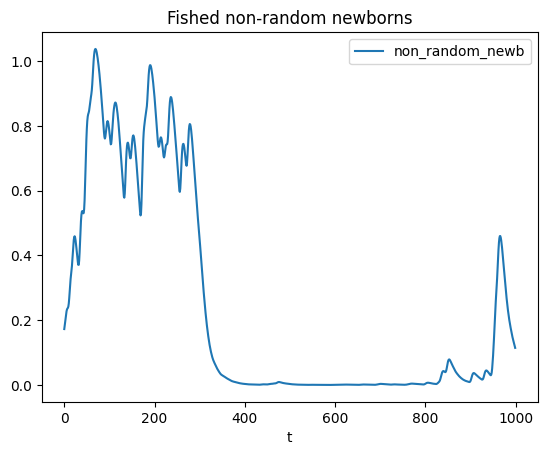

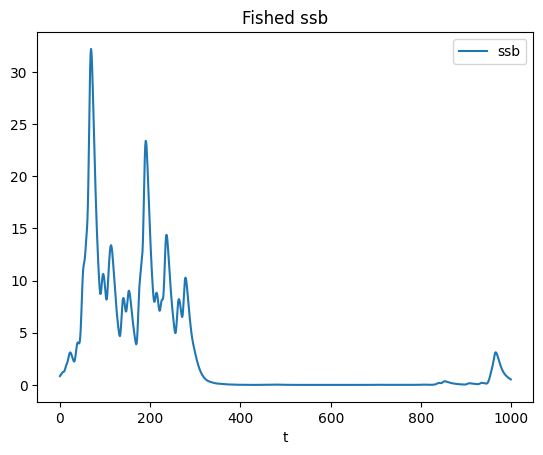

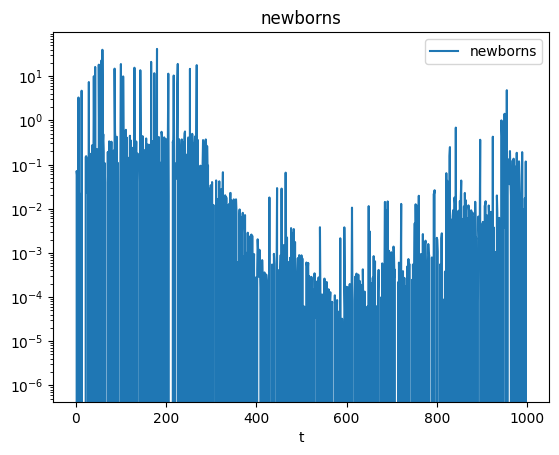

In [92]:
mid_ep.plot(x='t', y = ['total_pop'], title='total population')
mid_ep.plot(x='t', y = ['non_random_newb'], title='Fished non-random newborns')
mid_ep.plot(x='t', y = ['ssb'], title='Fished ssb')
mid_ep.plot(x='t', y = ['newborns'], title='newborns', logy=True)